In [57]:
import matplotlib.pyplot as plt 
import numpy as np 


In [58]:
class Player:
    def __init__(self, x, y, color, idy, n_walls):
        self.id = idy
        self.x = x
        self.y = y
        self.color = color
        self.walls = n_walls

    def move_left(self):
        print("Player: ", self.id, "moved left")
        self.x = self.x - 2

    def move_right(self):
        print("Player: ", self.id, "moved right")
        self.x = self.x + 2

    def move_up(self):
        print("Player: ", self.id, "moved up")
        self.y = self.y - 2

    def move_down(self):
        print("Player: ", self.id, "moved down")
        self.y = self.y - 2
    
    def add_wall(self, x, y):
        if (self.walls != 0):
            self.walls = self.walls - 1
            print("You have ", self.walls, " left")
        else:
            print("You don't have any walls left!!")


In [59]:
players = []
def addPlayers(nop, ax):
    initState = [[0, 8, 'royalblue'], [16,8,'limegreen'], 
                 [8, 0, 'gold'],     [8, 16, 'deeppink']]

    for i in range(nop):
        p = Player(initState[i][0], initState[i][1], initState[i][2], i+1, 20//nop)
        players.append(p)

def drawPlayers(ax):
    for p in players:
        ax.text(p.x, p.y, u'\u265F', size=30, 
        ha='center', va='center', color=p.color)

In [60]:
def addWalls(nop, ax):
    if (nop == 2):
    #1st player's walls
        for i in range(10):
            ax.text(-1, i+3, u'\u268A', size=30, ha='center', va='baseline')

    #2nd player's walls
        for i in range(10):
            ax.text(17, i+3, u'\u268A', size=30, ha='center', va='baseline')

    if (nop == 4):
    #1st player's walls
        for i in range(5):
            ax.text(-1, i+6, u'\u268A', size=30, ha='center', va='baseline')

    #2nd player's walls
        for i in range(5):
            ax.text(17, i+6, u'\u268A', size=30, ha='center', va='baseline')

    #3rd player's walls
        for i in range(5):
            ax.text(i+6, 17, u'\u2759', size=20, ha='center', va='center')

    #4th player's walls
        for i in range(5):
            ax.text(i+6, -1, u'\u2759', size=20, ha='center', va='center')


In [61]:
#Nota, personaje avanza de 2 en 2, ya que se debe reservar un espacio para las paredes
def drawQuoridorBoard(nop):
    bo = np.zeros((17, 17, 3)) #(9, 9) = 9x9 board size + spaces between for walls
    #total of 17x17 board
    bo += 0.8 #opactiy of black spaces
    bo[ ::2, ::2] = 1
    bo[0::2, 0::2] = 1

    fig, ax = plt.subplots(figsize=(7,7)) #figsize = size of the board
    ax.imshow(bo, interpolation='nearest')

    #add players:
    addPlayers(nop, ax)
    drawPlayers(ax)

    #add walls
    #DO THE SAME THAT YOU DID TO PLAYERS FOR WALLS, AND MAKE THEM AN ARRAY              ATTRIBUTE OF THE PLAYER
    addWalls(nop, ax) #only add if boolean from first game or something
    #drawWalls(nop, ax)

    ax.set(xticks=[], yticks=[])
    ax.axis('image')

    plt.show()

In [62]:
def game():
    bo = np.zeros((17, 17, 3)) #(9, 9) = 9x9 board size + spaces between for walls
    #total of 17x17 board
    bo += 0.8 #opactiy of black spaces
    bo[ ::2, ::2] = 1
    bo[0::2, 0::2] = 1

    fig, ax = plt.subplots(figsize=(7,7)) #figsize = size of the board
    ax.imshow(bo, interpolation='nearest')

    #since the game already started, you just draw the players
    drawPlayers(ax)

    #just draw the walls
    #drawWalls(nop, ax)

    ax.set(xticks=[], yticks=[])
    ax.axis('image')

    plt.show()

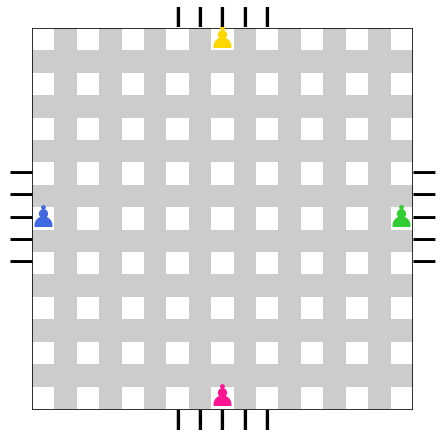

Player:  1 moved up


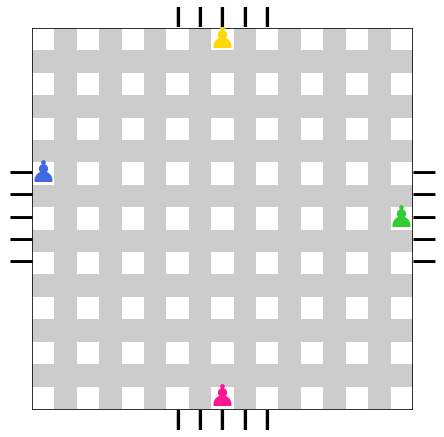

Player:  2 moved up


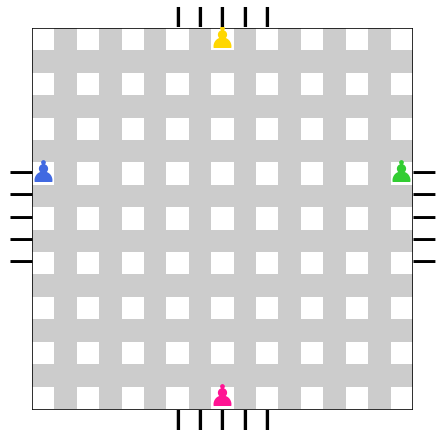

Player:  3 moved left


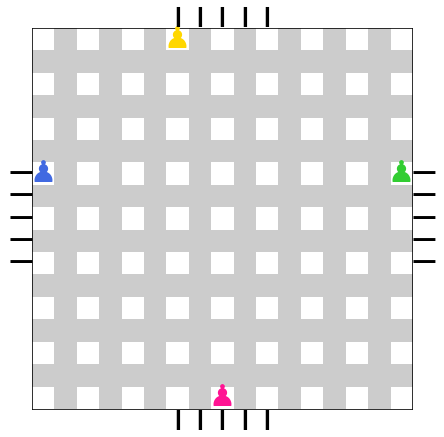

Player:  4 moved up


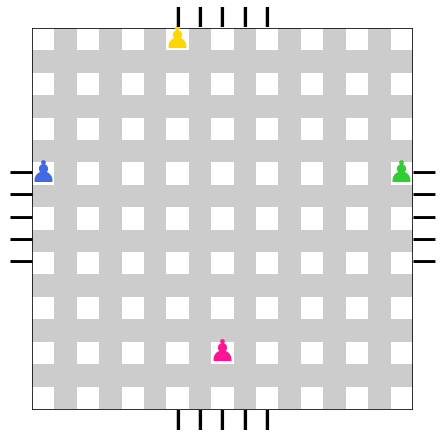

In [63]:
#note: Quoridor can only be played by either 2 or 4 players
#It is imposible to play with 3 players due to the amount of walls
#20 is the amount of walls that should be divided into the number of players
#Ergo, it can only be played by a divisble by 10 number of players (2 or 4)

nop = 4 #number of players

drawQuoridorBoard(nop)
players[0].move_up()
#game() instead of drawQuoridorBoard
drawQuoridorBoard(nop)
players[1].move_up()
drawQuoridorBoard(nop)
players[2].move_left()
drawQuoridorBoard(nop)
players[3].move_up()
drawQuoridorBoard(nop)